In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
algo_return = pd.read_csv('algo_returns.csv', 
parse_dates=True, infer_datetime_format=True, index_col='Date')
algo_return.sort_index(inplace=True)

sp_500 = pd.read_csv('sp500_history.csv', 
parse_dates=True, infer_datetime_format=True, index_col='Date')
sp_500 = sp_500.sort_index()

whale_returns = pd.read_csv('whale_returns.csv', 
parse_dates=True, infer_datetime_format=True, index_col='Date')
whale_returns.sort_index(inplace=True
)

In [3]:
# drop null values
algo_return.dropna(inplace=True)
sp_500.dropna(inplace=True)
whale_returns.dropna(inplace=True)

In [4]:
sp_500['Close'] = sp_500['Close'].str.replace('$', "")
# set close as a float instead of a string
sp_500['Close'] = sp_500['Close'].astype("float")

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_7924/16546009.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_500['Close'] = sp_500['Close'].str.replace('$', "")


In [60]:
SP_daily_returns = sp_500.pct_change()
SP_daily_returns = SP_daily_returns.rename(columns = {"Close":"S&P 500"})

In [6]:
combined_csv = pd.concat([SP_daily_returns, whale_returns, algo_return], axis='columns', join='inner')

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

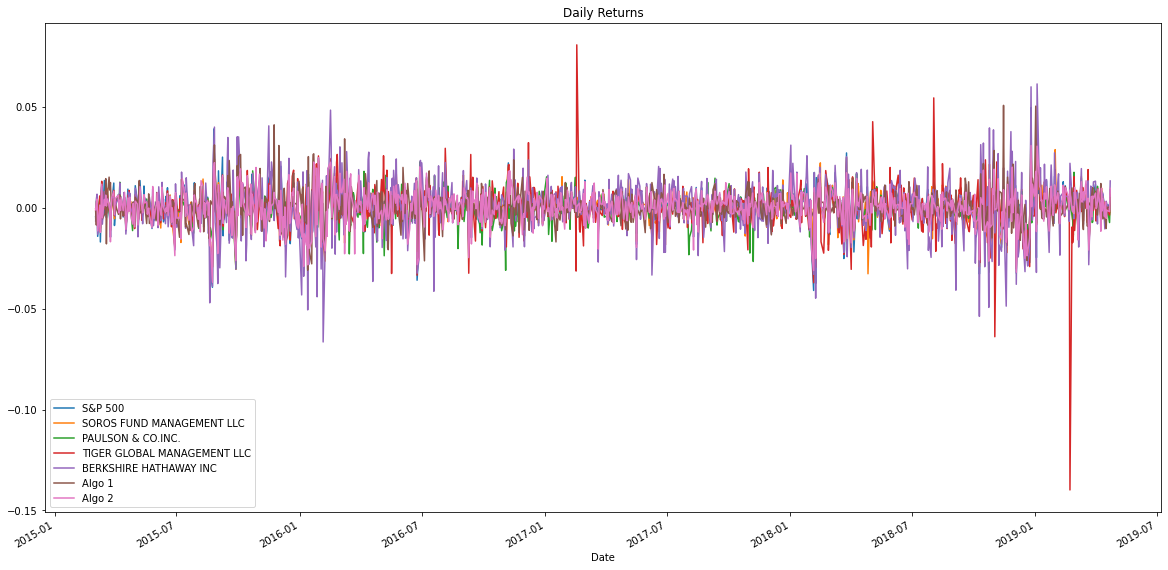

In [7]:
#  Calculate and plot daily returns of all portfolios.

combined_csv.plot(figsize =(20,10), title = "Daily Returns")

<AxesSubplot:xlabel='Date'>

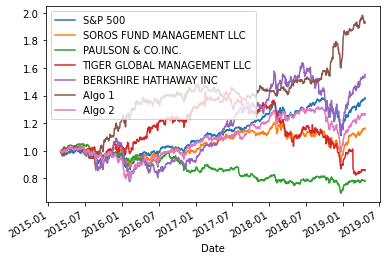

In [8]:
# Calculate and plot cumulative returns for all portfolios. Does any portfolio outperform the S&P 500?

(1 + combined_csv).cumprod().plot()

<AxesSubplot:title={'center':'Portfolios Risk'}>

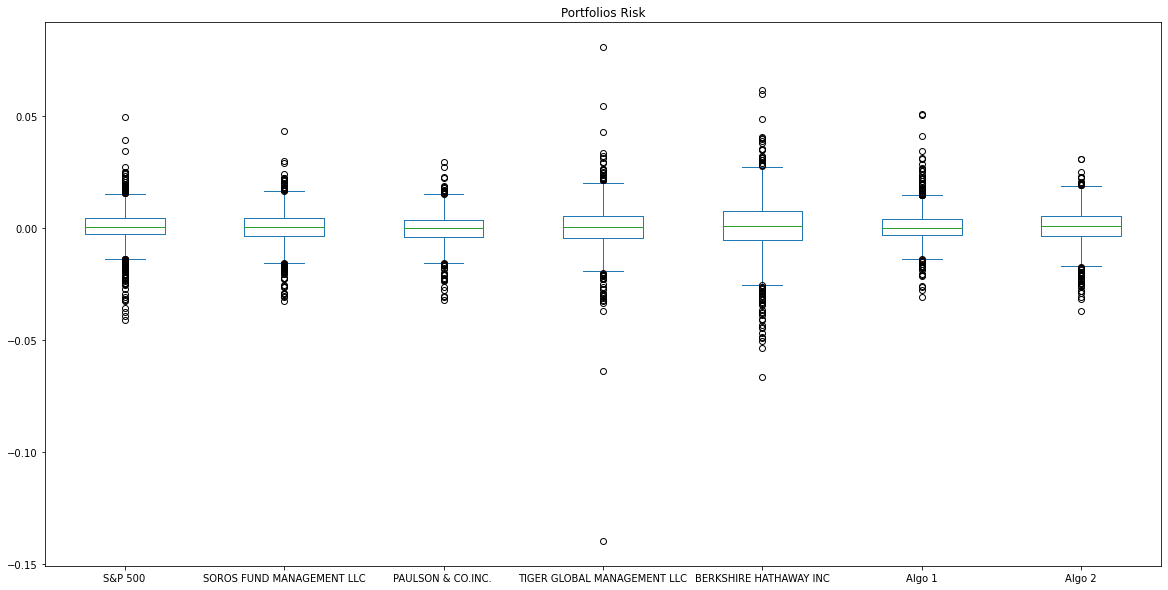

In [9]:
# Create a box plot for each of the returns.
combined_csv.plot.box(figsize=(20,10), title = "Portfolios Risk")


In [40]:
# Calculate the standard deviation for each portfolio
combined_csv.std()

#  Determine which portfolios are riskier than the S&P 500.
S_P_std = combined_csv['S&P 500'].std()

combined_csv.std() > S_P_std

S&P 500                        0.008554
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
dtype: float64

In [11]:
# Calculate the Annualized Standard Deviation.

combined_csv.std() * np.sqrt(252)

S&P 500                        0.135786
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
dtype: float64

<AxesSubplot:xlabel='Date'>

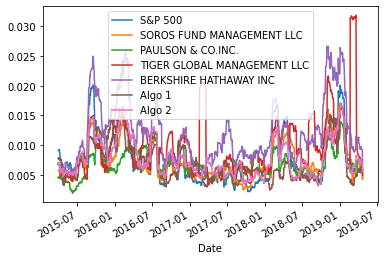

In [47]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
combined_rolling_std = combined_csv.rolling(window=21).std()
combined_rolling_std.plot()

In [13]:
# Calculate and plot the correlation between each stock to determine which portfolios may mimick the S&P 500
correlation = combined_csv.corr()
correlation.style.background_gradient()
# matlib

,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
S&P 500,1.000000,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764
SOROS FUND MANAGEMENT LLC,0.837864,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873
PAULSON & CO.INC.,0.669732,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152
TIGER GLOBAL MANAGEMENT LLC,0.623946,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414
BERKSHIRE HATHAWAY INC,0.751371,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082
Algo 1,0.279494,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243
Algo 2,0.858764,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000


<AxesSubplot:xlabel='Date'>

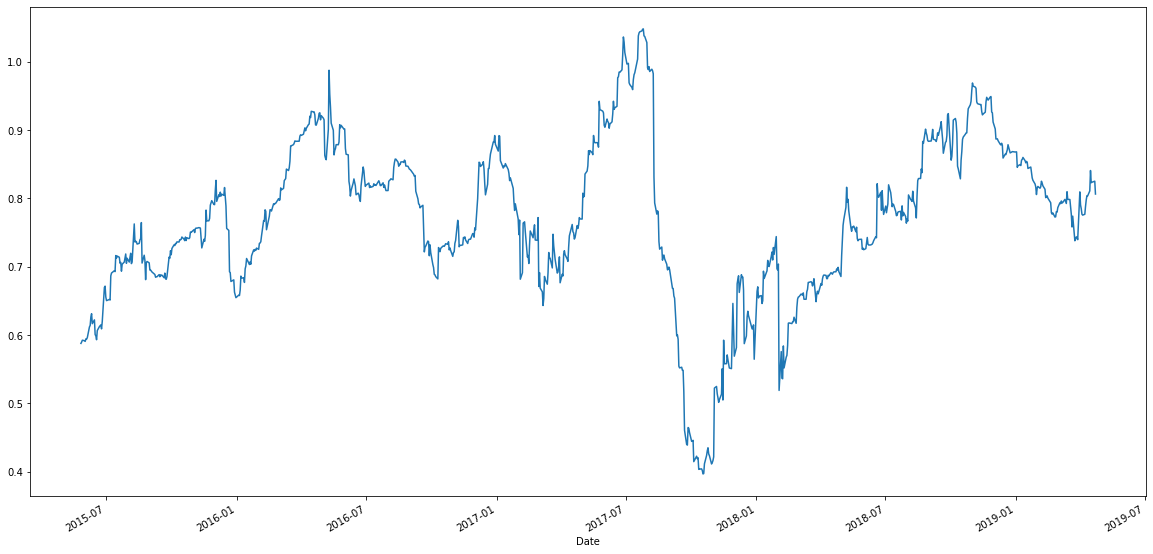

In [14]:
combined_csv = combined_csv.rename(columns={'Close': 'S&P 500'})
# Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500.
sorros_covariance = combined_csv['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_csv['S&P 500'])
SP_variance = combined_csv['S&P 500'].rolling(window=60).var()
Sorors_beta_rolling = sorros_covariance / SP_variance
Sorors_beta_rolling.plot(figsize=(20,10))


<AxesSubplot:xlabel='Date'>

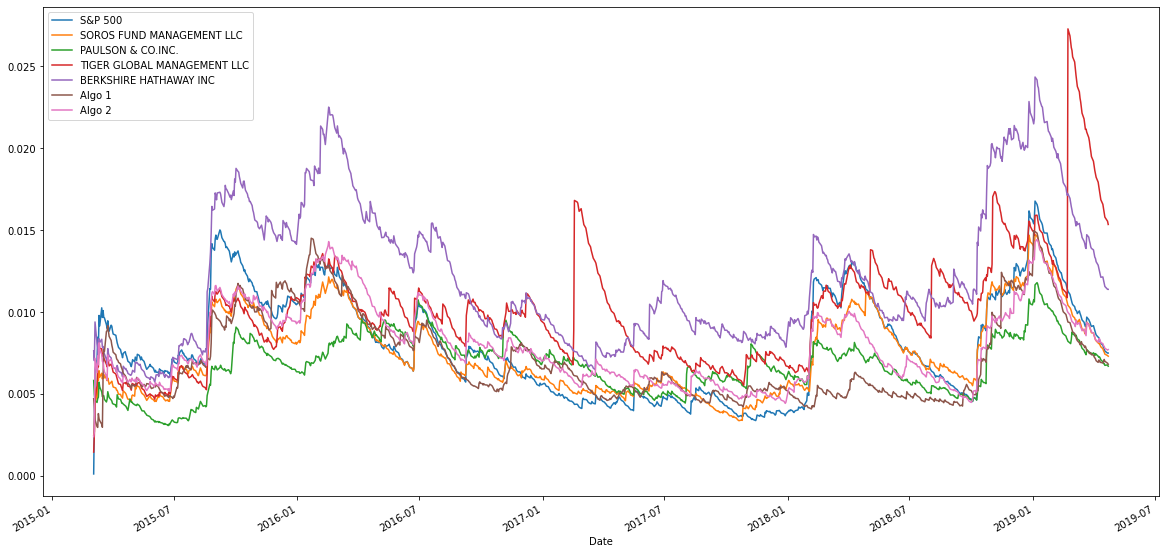

In [15]:
# Use `ewm` to calculate the rolling window
combined_csv.ewm(halflife=21).std().plot(figsize=(20,10))


In [ ]:
# 1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.

sharpe_ratio = (combined_csv.mean() * 252) / (combined_csv.std() * np.sqrt(252)) 
sharpe_ratio.plot(kind='bar')


In [ ]:
# Algo 1 outperforms all other strategies including the S&P 500
# Algo 2 also outperforms MOST of the other strategies with the S&P and Berkshire being the only exceptions
# to that

In [ ]:
# Creat a custom portfolio

In [59]:
aapl_csv = pd.read_csv('aapl_historical.csv', parse_dates=True, infer_datetime_format=True, index_col="Trade DATE")
cost_csv = pd.read_csv('cost_historical.csv', parse_dates=True, infer_datetime_format=True, index_col="Trade DATE")
goog_csv = pd.read_csv('goog_historical.csv', parse_dates=True, infer_datetime_format=True, index_col="Trade DATE")
combined_stocks = pd.concat([aapl_csv,cost_csv,goog_csv], axis='columns', join='inner')
combined_stocks.sort_index(inplace=True)

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,COST,195.76,GOOG,1098.26
2018-05-14,AAPL,188.15,COST,195.88,GOOG,1100.20
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59
...,...,...,...,...,...,...
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10


In [35]:
# combined_stocks.drop(columns='Symbol',inplace=True)
combined_stocks.columns = ['AAPL', 'COST', 'GOOG']
combined_stocks.dropna()


,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40
...,...,...,...
2018-05-17,186.99,199.60,1078.59
2018-05-16,188.18,198.71,1081.77
2018-05-15,186.44,195.48,1079.23


In [ ]:
combined_returns = combined_stocks.pct_change()


In [ ]:
#  Run the following analyses:

#     * Calculate the Annualized Standard Deviation.
#     * Calculate and plot rolling `std` with a 21-day window.
#     * Calculate and plot the correlation.
#     * Calculate and plot beta for your portfolio compared to the S&P 60 TSX.
#     * Calculate the Sharpe ratios and generate a bar plot.

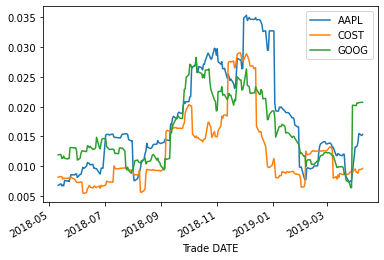

In [61]:
# annualized_std = combined_returns.std() * np.sqrt(252)
rolling_STD_21 = combined_returns.rolling(window=21).std().plot()
# returns_corr = combined_returns.corr().plot()

In [ ]:
portfolio_variance = combined_returns.var()
portfolio_covariance = combined_returns.cov()
portfolio_beta = portfolio_covariance / portfolio_variance
portfolio_beta.plot()

<AxesSubplot:>

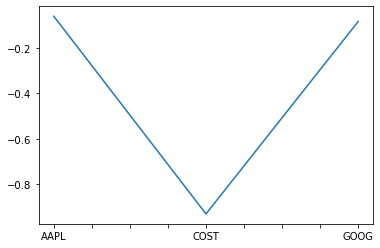

In [64]:
Portfolio_sharpe_ratio = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252)) 
Portfolio_sharpe_ratio.plot()